# I_Na_K

In [17]:
import os
import sys 
from constants import Na_i, K_i, Ca_i, Na_o, K_o, Ca_o, g_BNa, g_BCa, g_BK, R, T, F,E_K,E_CaL,E_Na,I_NaK_max,k_m_K,k_m_Na
import numpy as np
import matplotlib.pyplot as plt

### Solving

In [13]:

# Calculate sigma
sigma = (np.exp(Na_i / 67.3) - 1.0) / 7.0

# Calculate I_NaK
def compute_current(V, I_NaK_max, sigma, K_o, k_m_K, F, R, T):
    term1 = 1.0 / (1.0 + 0.1245 * np.exp(0.1 * V * F / (R * T)) + 0.0365 * sigma * np.exp(V * F / (R * T)))
    term2 = K_o / (K_o + k_m_K)
    return I_NaK_max * term1 * term2


In [29]:

V_range = np.linspace(-60, 60, 100)

# Initialising arrays 
I_NaK_values = [] # nanoamperes

for V in V_range:
    I_NaK= compute_current(V, I_NaK_max, sigma, K_o, k_m_K, F, R, T)
    I_NaK_values.append(I_NaK)

I_NaK_values = I_NaK_values



### Plotting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


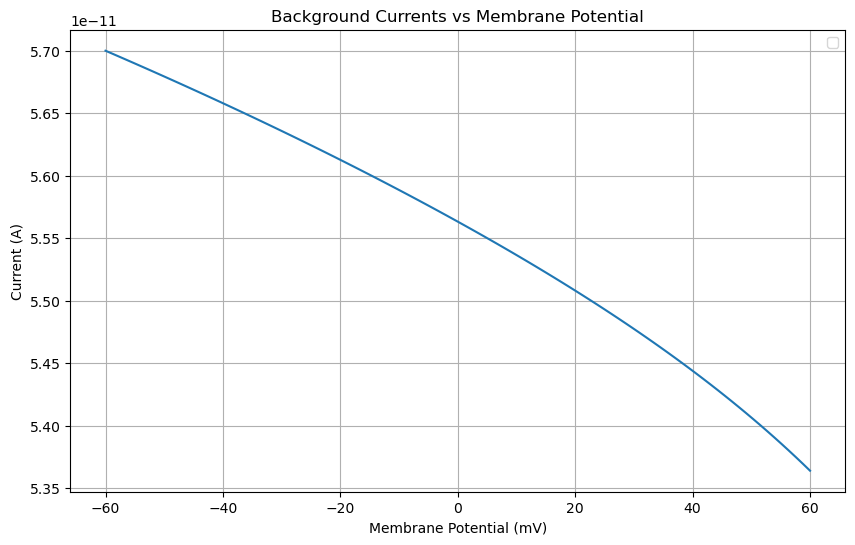

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(V_range, I_NaK_values)
plt.xlabel('Membrane Potential (mV)')
plt.ylabel('Current (A)')
plt.title('Background Currents vs Membrane Potential')
plt.grid(True)
plt.show()